<a href="https://colab.research.google.com/github/VyshnaviKurivella/California-House-Price-Prediction/blob/main/Housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn

#Loading the dataset
dataset = pd.read_csv("/content/drive/MyDrive/DataSets/housing.csv")
dataset.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
dataset["ocean_proximity"].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


In [6]:
dataset.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


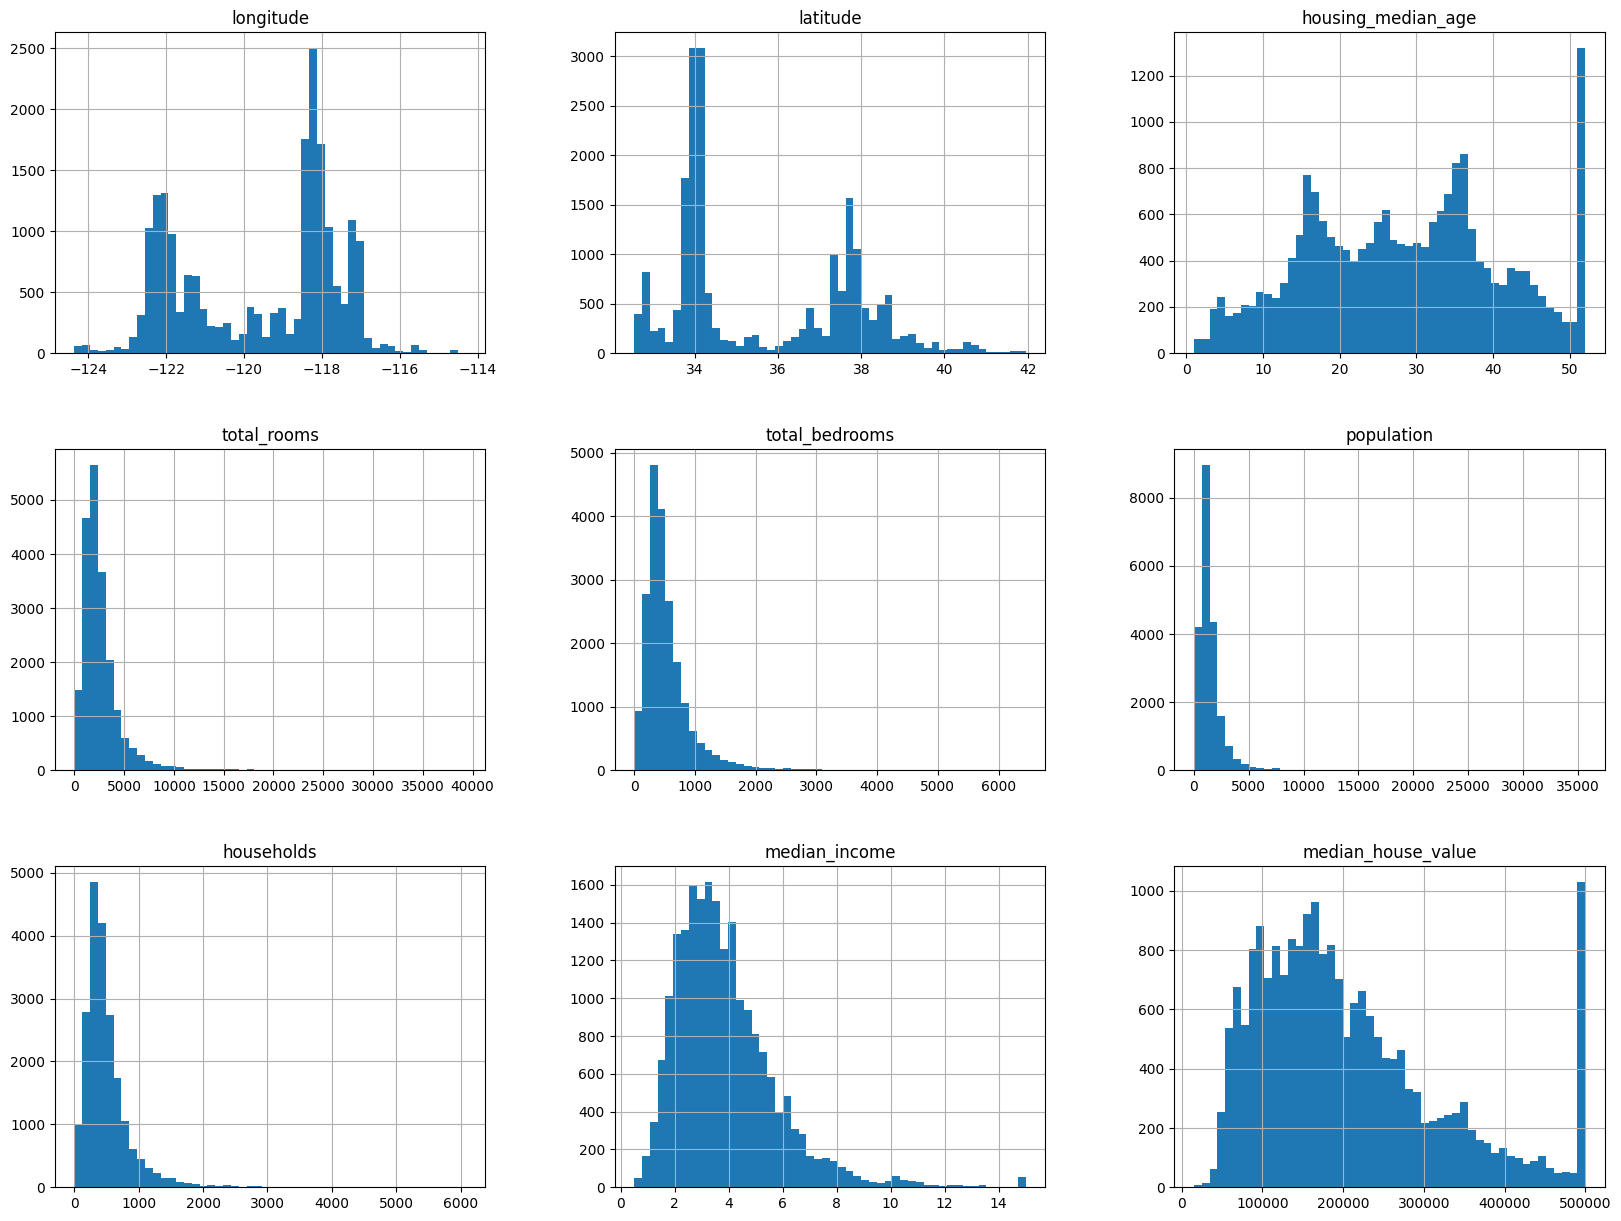

In [7]:
dataset.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

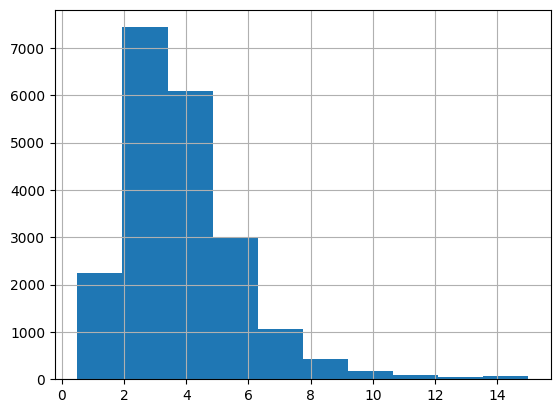

In [8]:
dataset["median_income"].hist()

To implement the Stratified Sampling Method, a new attribute called "income_category" is added to the dataset. Then, stratified sampling is performed on the dataset based on the income category.

In [9]:
dataset["income_category"] = np.ceil(dataset["median_income"]/1.5)
dataset["income_category"].where(dataset["income_category"]<5,5.0,inplace=True)

from sklearn.model_selection import StratifiedShuffleSplit

sampling = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in sampling.split(dataset, dataset["income_category"]):
  strat_train_set = dataset.loc[train_index]
  strat_test_set = dataset.loc[test_index]


<Axes: >

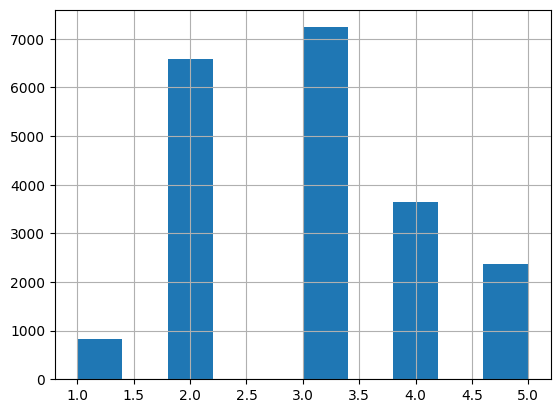

In [10]:
dataset["income_category"].hist()

In [11]:
dataset["income_category"].value_counts()/len(dataset)

,count
income_category,
3.0,0.350581
2.0,0.318847
4.0,0.176308
5.0,0.114438
1.0,0.039826


In [12]:
strat_test_set["income_category"].value_counts()/len(strat_test_set)

,count
income_category,
3.0,0.350614
2.0,0.318798
4.0,0.176357
5.0,0.114341
1.0,0.039890


Based on the above output, we can definitely say that the test set represents the dataset and is not skewed. Now, as the original dataset doesn't have the "income_category" as an attribute, we should remove that.

In [13]:
strat_train_set.drop(["income_category"], axis=1, inplace=True)
strat_test_set.drop(["income_category"], axis=1, inplace=True)

In [14]:
dataset = strat_train_set.copy()

<Axes: xlabel='longitude', ylabel='latitude'>

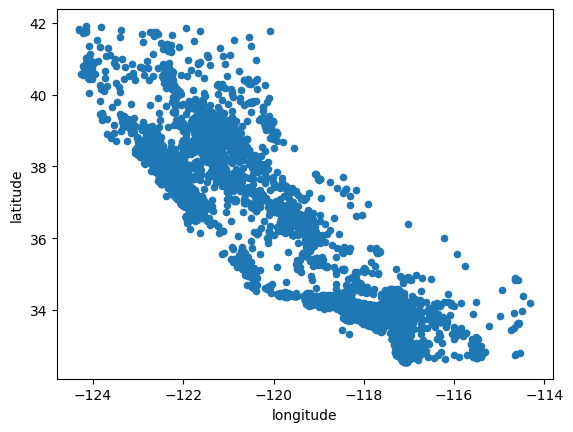

In [15]:
dataset.plot(kind="scatter",x="longitude",y="latitude")

<Axes: xlabel='longitude', ylabel='latitude'>

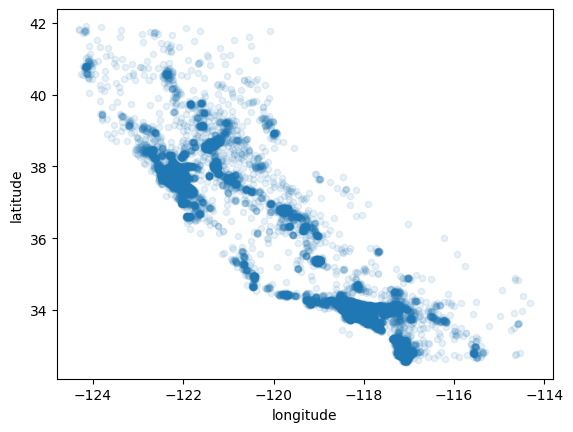

In [16]:
dataset.plot(kind="scatter",x="longitude",y="latitude",alpha=0.1)

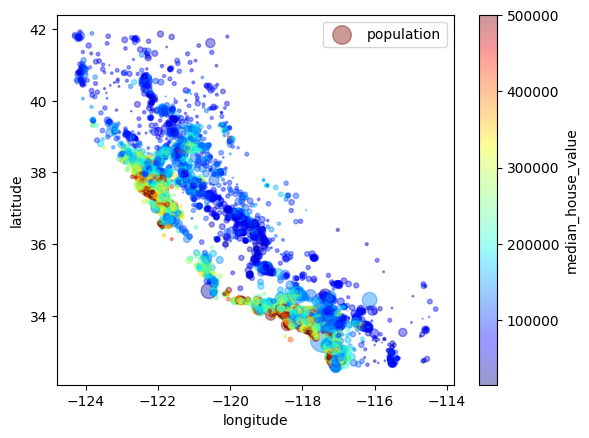

In [17]:
dataset.plot(kind="scatter",x="longitude",y="latitude",alpha=0.4,
             s=dataset["population"]/100,label="population",
             c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True
             )
plt.legend()

Let's look for any correlations that are present in this dataset.

In [18]:
corr_matrix = dataset.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687873
total_rooms,0.136801
housing_median_age,0.116305
households,0.066788
total_bedrooms,0.049523
population,-0.024592
longitude,-0.052345
latitude,-0.137864


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

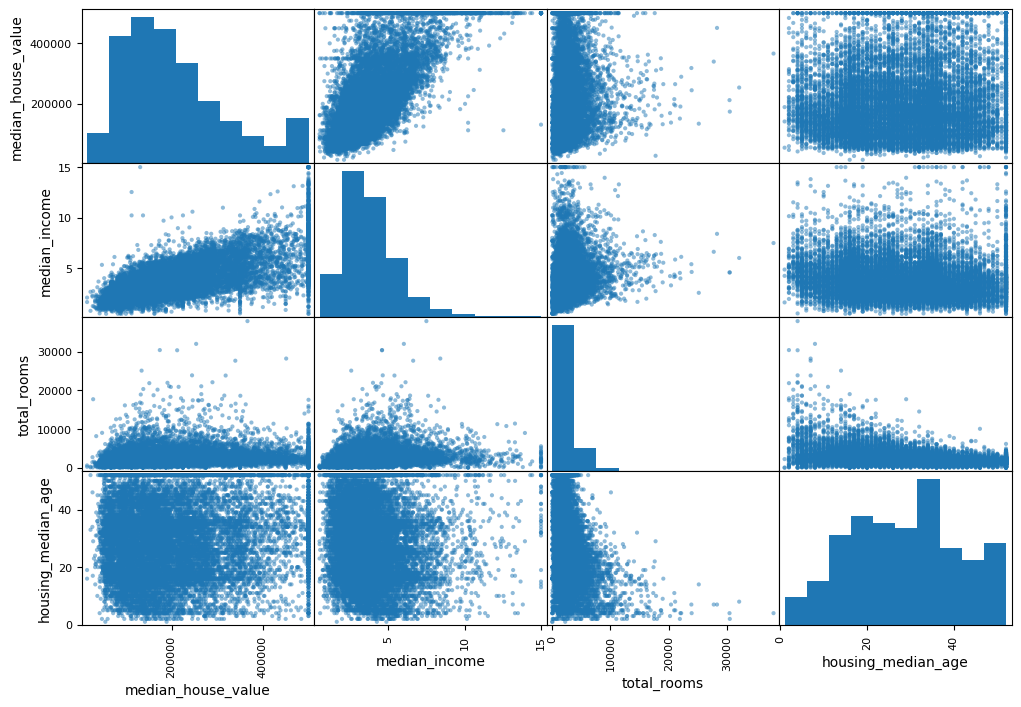

In [19]:
from pandas.plotting import scatter_matrix
attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(dataset[attributes], figsize=(12,8))

<Axes: xlabel='median_income', ylabel='median_house_value'>

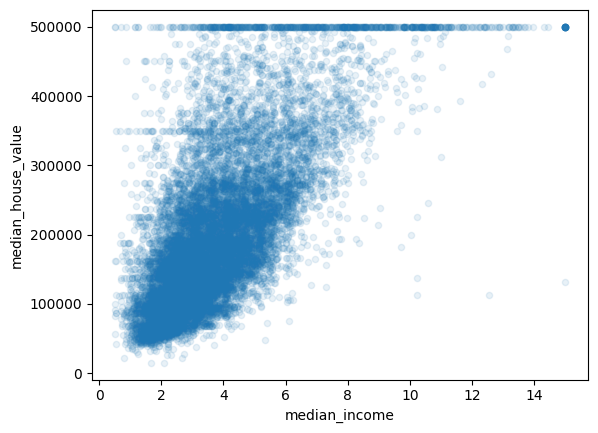

In [20]:
dataset.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

From this plot, it is clear that there is strong correlation between these two. And also there are few values where a the data points are forming a straight line which might effect the working of the model and needs to be taken care of.

In [21]:
dataset["rooms_per_household"] = dataset["total_rooms"]/dataset["households"]
dataset["bedrooms_per_room"] = dataset["total_bedrooms"]/dataset["total_rooms"]
dataset["population_per_household"] = dataset["population"]/dataset["households"]

In [22]:
corr_matrix = dataset.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

,median_house_value
median_house_value,1.000000
median_income,0.687873
rooms_per_household,0.144427
total_rooms,0.136801
housing_median_age,0.116305
households,0.066788
total_bedrooms,0.049523
population_per_household,-0.024005
population,-0.024592
longitude,-0.052345


Till now, all the changes on the dataset are done manually and now we have to create transformation functions in this data cleaning process so that we can apply these same functions on the new data instead of doing that manually every single time.

In [23]:
dataset = strat_train_set.drop("median_house_value",axis=1)
data_labels = strat_train_set["median_house_value"].copy()

Let's start the Data Cleaning process and start with handling the missing values first. To do that, we can use the **Imputer** class from Scikit-Learn.

In [24]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

To use this, we need a copy of the dataset which contains all the numeric values and let's set aside the attributes with other datatypes for a while.

In [25]:
num_dataset = dataset.drop("ocean_proximity", axis=1)
imputer.fit(num_dataset)

SimpleImputer(strategy='median')

In [26]:
imputer.statistics_

array([-118.51 ,   34.26 ,   29.   , 2111.   ,  430.   , 1159.   ,
        406.   ,    3.536])

In [27]:
num_dataset.median().values

array([-118.51 ,   34.26 ,   29.   , 2111.   ,  430.   , 1159.   ,
        406.   ,    3.536])

In [28]:
X = imputer.transform(num_dataset)

This function results an array and that is to be changed back to a dataset again.

In [29]:
trans_dataset = pd.DataFrame(X,columns=num_dataset.columns)

The ocean_proximity is not processed before since it is not a numerical attribute. We can transform that using the LabelBinarizer.

In [30]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
text_attribute = dataset["ocean_proximity"]
text_attribute_1hot = encoder.fit_transform(text_attribute)
print(text_attribute_1hot)

[[1 0 0 0 0]
 [0 1 0 0 0]
 [1 0 0 0 0]
 ...
 [0 1 0 0 0]
 [0 0 0 0 1]
 [1 0 0 0 0]]


In [31]:
from sklearn.base import BaseEstimator,TransformerMixin

rooms_ix, bedrooms_ix, population_ix, household_ix = 3,4,5,6
class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
  def __init__(self, add_bedrooms_per_room=True):
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self
  def transform(self, X, y=None):
    rooms_per_household = X[:,rooms_ix]/X[:,household_ix]
    population_per_household = X[:,population_ix]/X[:,household_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:,bedrooms_ix]/X[:,rooms_ix]
      return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
    else:
      return np.c_[X,rooms_per_household,population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
dataset_extra_attr = attr_adder.transform(dataset.values)

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attr_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

dataset_num_tr = num_pipeline.fit_transform(num_dataset)

To combine both the numerical pipelines with the others, the FeatureUnion class from scikit-learn can be used.

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attributes = list(num_dataset)
cat_attributes = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attributes),
        ("cat", OneHotEncoder(), cat_attributes),
    ])

dataset_prepared = full_pipeline.fit_transform(dataset)

Now as the dataset is ready, we can start on selecting and training the machine learning models on this data.

In [34]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(dataset_prepared, data_labels)

from sklearn.metrics import mean_squared_error

dataset_predictions = lin_reg.predict(dataset_prepared)
lin_mse = mean_squared_error(data_labels, dataset_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

68671.29479037311


This model is not working great enough as the meadian range of housing values is \$120000 and \$265000. So, an error of 68671 is not relaible. So, let's try building other models as well.

In [35]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(dataset_prepared, data_labels)

dataset_predictions = tree_reg.predict(dataset_prepared)
tree_mse = mean_squared_error(data_labels, dataset_predictions)
tree_rmse = np.sqrt(tree_mse)
print(tree_rmse)

0.0


The linear regression is an example of underfitting and in this decision tree, it is overfitting of the data. Let's try running the k-fold cross validation on this set.

In [36]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, dataset_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
rmse_scores = np.sqrt(-scores)

print(rmse_scores)
print('Mean:', rmse_scores.mean())
print('Standard Deviation:', rmse_scores.std())

[68912.54044634 69614.62833814 71566.711792   69971.96991276
 73519.62568885 71349.71374036 71797.42545564 69915.42730813
 70098.49214111 73153.07235748]
Mean: 70989.9607180809
Standard Deviation: 1462.367185861744


In [37]:
lin_scores = cross_val_score(lin_reg, dataset_prepared, data_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

print(lin_rmse_scores)
print('Mean:', lin_rmse_scores.mean())
print('Standard Deviation:', lin_rmse_scores.std())

[65829.44152145 77056.74494539 64126.62164766 70328.71895431
 68303.09942861 70916.94402158 70104.24228447 65102.15137703
 69723.40940468 71281.95671343]
Mean: 69277.33302986124
Standard Deviation: 3549.8355175753077


In [38]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(dataset_prepared, data_labels)
housing_predictions = forest_reg.predict(dataset_prepared)
forest_mse = mean_squared_error(data_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse)

forest_scores = cross_val_score(forest_reg, dataset_prepared, data_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

print(forest_rmse_scores)
print('Mean:', forest_rmse_scores.mean())
print('Standard Deviation:', forest_rmse_scores.std())

18798.28409966118
[48685.14400309 52204.43367511 46819.00801955 51909.25953473
 51340.88354755 50153.52270507 51050.82130478 48013.18424933
 50686.65963736 52553.91248876]
Mean: 50341.68291653414
Standard Deviation: 1818.0224015485157


In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'n_estimators':[3,10,30], 'max_features':[2,4,6,8]},
    {'bootstrap': [False], 'n_estimators':[3,10], 'max_features':[2,3,4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(dataset_prepared, data_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [40]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [41]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64462.897299562086 {'max_features': 2, 'n_estimators': 3}
55873.91315736584 {'max_features': 2, 'n_estimators': 10}
53040.839833252365 {'max_features': 2, 'n_estimators': 30}
61304.6749030413 {'max_features': 4, 'n_estimators': 3}
53511.97081182132 {'max_features': 4, 'n_estimators': 10}
50904.03369664618 {'max_features': 4, 'n_estimators': 30}
59884.501807919296 {'max_features': 6, 'n_estimators': 3}
52306.022206202324 {'max_features': 6, 'n_estimators': 10}
50416.08416231723 {'max_features': 6, 'n_estimators': 30}
59654.06812485074 {'max_features': 8, 'n_estimators': 3}
52421.34355026881 {'max_features': 8, 'n_estimators': 10}
50435.22769755062 {'max_features': 8, 'n_estimators': 30}
63398.14945545889 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54286.98750575229 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60843.999324983975 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52657.79397796767 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [42]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[8.17603537e-02 7.71231015e-02 4.03765146e-02 1.82871296e-02
 1.66930543e-02 1.80733666e-02 1.67056398e-02 3.37251214e-01
 5.70283895e-02 1.09997535e-01 7.02884384e-02 1.15512594e-02
 1.37069500e-01 1.15556729e-04 2.50540077e-03 5.17354578e-03]


In [43]:
feature_ratings = grid_search.best_estimator_.feature_importances_
print(feature_ratings)

[8.17603537e-02 7.71231015e-02 4.03765146e-02 1.82871296e-02
 1.66930543e-02 1.80733666e-02 1.67056398e-02 3.37251214e-01
 5.70283895e-02 1.09997535e-01 7.02884384e-02 1.15512594e-02
 1.37069500e-01 1.15556729e-04 2.50540077e-03 5.17354578e-03]


In [44]:
extra_attributes = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_one_hot_attribs = list(encoder.classes_)
attributes = num_attributes + extra_attributes + cat_one_hot_attribs
print(sorted(zip(feature_importances, attributes), reverse=True))

[(0.33725121372244576, 'median_income'), (0.13706950044240623, 'INLAND'), (0.10999753503037048, 'pop_per_hhold'), (0.08176035371146463, 'longitude'), (0.07712310154610907, 'latitude'), (0.07028843842397578, 'bedrooms_per_room'), (0.057028389500633284, 'rooms_per_hhold'), (0.0403765146178537, 'housing_median_age'), (0.018287129629271554, 'total_rooms'), (0.018073366617156302, 'population'), (0.016705639808601895, 'households'), (0.01669305430540692, 'total_bedrooms'), (0.01155125936625161, '<1H OCEAN'), (0.005173545775255011, 'NEAR OCEAN'), (0.0025054007733761124, 'NEAR BAY'), (0.00011555672942170003, 'ISLAND')]


In [45]:
final_model = grid_search.best_estimator_
x_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

x_test_prepared = full_pipeline.transform(x_test)
final_predictions = final_model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print("RMSE error on final model:",final_rmse)

RMSE error on final model: 48641.03482483369
